IMPORTING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


df = pd.read_excel("retail_data.csv.xlsx", nrows=5000)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.drop_duplicates(inplace=True)


KPI Section (like tiles in dashboard)

In [2]:
total_revenue = df['Amount'].sum()
unique_customers = df['Customer_ID'].nunique()
total_orders = df['Transaction_ID'].nunique()

print(f" Total Revenue: ₹{total_revenue:,.0f}")
print(f" Unique Customers: {unique_customers}")
print(f" Total Orders: {total_orders}")


 Total Revenue: ₹1,273,369
 Unique Customers: 4872
 Total Orders: 4993


Category-wise Revenue (Interactive Dropdown)

In [3]:
def plot_category_revenue(city):
    temp = df.copy()
    if city != "All":
        temp = temp[temp['City'] == city]
    category_revenue = temp.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Revenue by Category ({city})")
    plt.show()

city_selector = widgets.Dropdown(options=["All"] + list(df['City'].dropna().unique()), description="City:")
widgets.interact(plot_category_revenue, city=city_selector)


interactive(children=(Dropdown(description='City:', options=('All', 'Dortmund', 'Nottingham', 'Geelong', 'Edmo…

<function __main__.plot_category_revenue(city)>

Customer Retention (Pivot View)

In [4]:
df['FirstPurchase'] = df.groupby('Customer_ID')['Date'].transform('min')
df['LastPurchase'] = df.groupby('Customer_ID')['Date'].transform('max')

df['Customer_Type'] = df.apply(
    lambda row: 'New' if row['Date'] == row['FirstPurchase']
    else ('Lost' if row['Date'] == row['LastPurchase'] else 'Returning'),
    axis=1
)

retention = df.groupby(['Product_Category','Customer_Type'])['Customer_ID'].nunique().unstack().fillna(0)
display(retention)


Customer_Type,Lost,New,Returning
Product_Category,,,
Books,21,965,2
Clothing,29,991,1
Electronics,19,983,0
Grocery,19,1008,0
Home Decor,29,918,1


Spending Distribution (Boxplot)

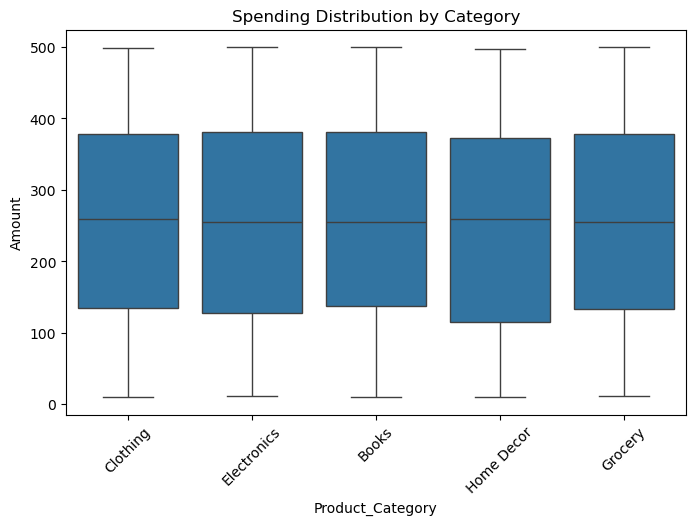

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Product_Category", y="Amount", data=df)
plt.xticks(rotation=45)
plt.title("Spending Distribution by Category")
plt.show()


Export Reports

In [ ]:
with pd.ExcelWriter("ecommerce_reports.xlsx") as writer:
    df.to_excel(writer, sheet_name="AllData", index=False)
    retention.to_excel(writer, sheet_name="Retention")
print(" Reports exported as ecommerce_reports.xlsx")


✅ Reports exported as ecommerce_reports.xlsx
